In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway # ANOVA Analysis
from scipy.stats import ttest_ind # Conducting a T test
from scipy.stats import chi2_contingency # Statistical model for performing a chi squared analysis

In [3]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.duplicated(keep=False).sum()


0

In [10]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

In [11]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
# Adding CIBIL Rating column with values (Poor, Average, Good and Excellent)

def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Error"

df['CIBIL_rating'] = df['cibil_score'].apply(cibil_rating)

In [15]:
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low-Middle"
    elif 4000001 <= value <= 7500000:
        return "Upper-Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return "Very High Income"

df['Income level'] = df['income_annum'].apply(income_level)

In [16]:
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000000:
        return "Silver"
    elif 20000001 <= value <= 30000000:
        return "Gold"
    elif 30000001 <= value <= 40000000:
        return "Platinum"
    else:
        return "Unknown"

df['Loan Rating'] = df['loan_amount'].apply(loan_rating)

In [17]:
def loan_term(value):
    if 0 <= value <= 7:
        return "Short Term"
    elif 8 <= value <= 14:
        return "Intermediate"
    elif 15 <= value <= 20:
        return "Long Term"
    else:
        return "Unknown"

df['Loan Term Type'] = df['loan_term'].apply(loan_term)

In [18]:
def dependents(value):
    if 0 <= value <= 1:
        return "Low"
    elif 2 <= value <= 3:
        return "Moderate"
    elif 4 <= value <= 5:
        return "High"
    else:
        return "Unknown"

df['Dependent Level'] = df['no_of_dependents'].apply(dependents)

In [19]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating,Income level,Loan Rating,Loan Term Type,Dependent Level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term,High


In [20]:
# Group data based on income level

income = df['Income level'].value_counts().reset_index()
income = income.rename(columns={'Income level':'Income Levels', 'count': "Number of Applicants"})
income

,Income Levels,Number of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


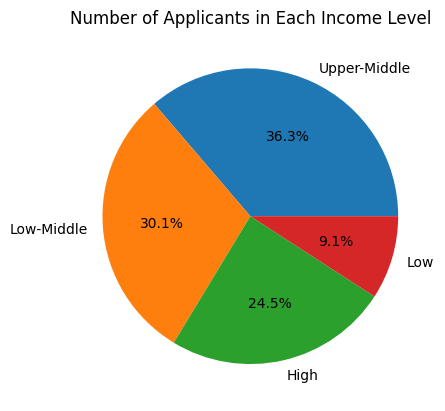

In [21]:
# Ploting the pie chart
plt.pie(income['Number of Applicants'], labels=income['Income Levels'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

In [23]:
# Grouping data based on Level of Education and Loan approval Status
education = df.groupby(['education', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
education = education[education['loan_status'].isin(['Approved', 'Rejected'])]

education

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


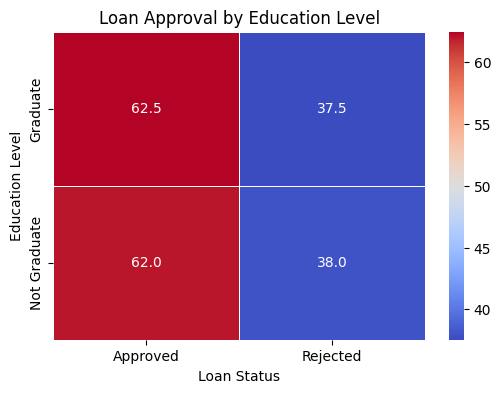

In [24]:
# Pivot Table
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Education Level")
plt.xlabel("Loan Status")
plt.ylabel("Education Level")

plt.show()

In [26]:
# Grouping data based on the CIBIL Rating and Loan approval Status
cibil_rating = df.groupby(['CIBIL_rating', 'loan_status']).size().reset_index()
cibil_rating = cibil_rating.rename(columns={0:'Total'})

cibil_rating

,CIBIL_rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


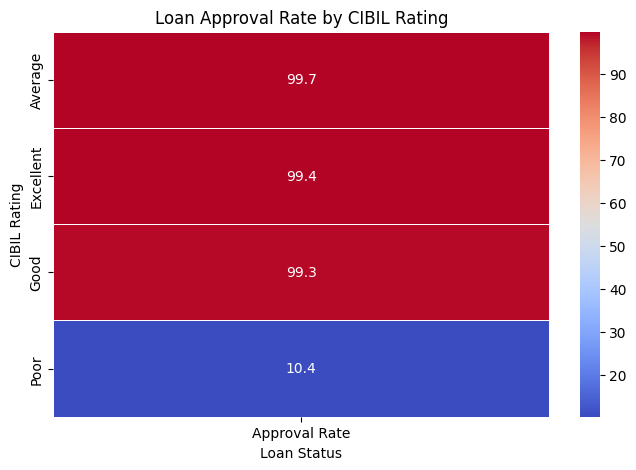

In [27]:
# Pivot Table
pivot_table = cibil_rating.pivot(index='CIBIL_rating', columns='loan_status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

# Creating heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval Rate by CIBIL Rating")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Rating")

plt.show()

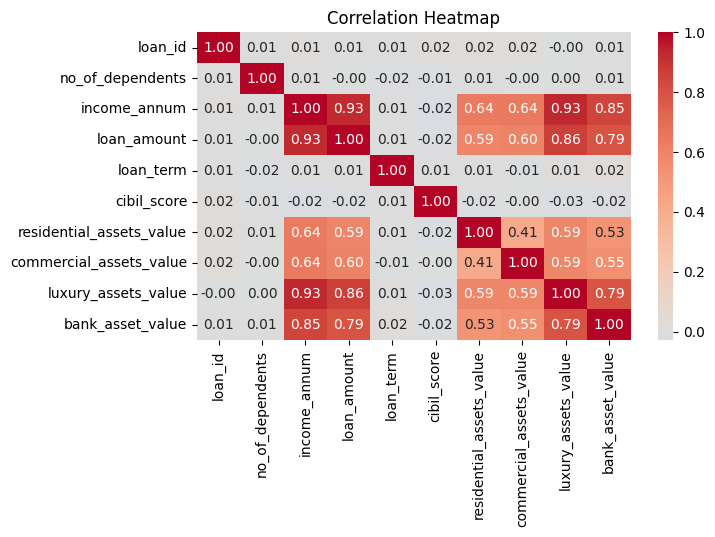

In [28]:
correlation_matrix = df.corr(numeric_only=True)

# Creating heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', center=0, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

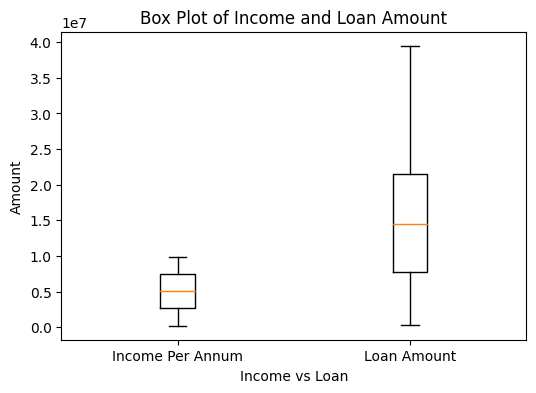

In [29]:
# Splitting data into groups
income = df['income_annum']
loan = df['loan_amount']

plt.figure(figsize=(6,4))
ax = plt.axes()

ax.boxplot([income, loan], labels=["Income Per Annum", "Loan Amount"])

plt.xlabel("Income vs Loan")
plt.ylabel("Amount")
plt.title("Box Plot of Income and Loan Amount")
plt.show()